# Model building

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.api as sa
from sklearn.linear_model import LinearRegression , Lasso
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from sklearn.ensemble import RandomForestRegressor


c:\users\mor\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
googleData=pd.read_csv(r'Test.csv',header=0,index_col=0)


FileNotFoundError: [Errno 2] File Test.csv does not exist: 'Test.csv'

In [ ]:
googleData['Type'] = googleData['Type'].apply(lambda x: int(str(x).replace('Free', '0')) if 'Free' in str(x) else int(str(x).replace('Paid', '1')))
googleData

# Linear Regression

In [4]:
googleData.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'SizeInMB', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df_model=googleData[['Rating','SizeInMB','Installs','Type','Price','Android Ver']]

In [6]:
df_dum=pd.get_dummies(df_model)

In [7]:
x=df_dum.drop('Rating',axis=1)
y=df_dum.Rating.values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
model=sm.OLS(y,x)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          1.653e+04
Date:                Thu, 23 Jul 2020   Prob (F-statistic):                        0.00
Time:                        18:47:37   Log-Likelihood:                         -6771.6
No. Observations:                8892   AIC:                                  1.361e+04
Df Residuals:                    8857   BIC:                                  1.386e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
SizeInMB                           0.0016      0.000      6.200      0.000       0.001       0.002
Installs                        1.966e-10   6.58e-11      2.986      0.003    6.75e-11    3.26e-10
Type                               0.1325      0.023      5.846      0.000       0.088       0.177
Price                             -0.0010      0.000     -2.997      0.003      -0.002      -0.000
Android Ver_1.0 and up             4.0437      0.367     11.014      0.000       3.324       4.763
Android Ver_1.5 and up             4.0066      0.130     30.835      0.000       3.752       4.261
Android Ver_1.6 and up             4.0605      0.056     72.659      0.000       3.951       4.170
Android Ver_2.0 and up             4.3344      0.100     43.332      0.000       4.138       4.531
Android Ver_2.0.1 and up           4.1971      0.197     21.306      0.000       3.811       4.583
Android Ver_2.1 and up             4.1137      0.049     83.531      0.000       4.017       4.210
Android Ver_2.2 and up             3.9395      0.037    107.202      0.000       3.867       4.011
Android Ver_2.3 and up             4.0555      0.023    179.605      0.000       4.011       4.100
Android Ver_2.3.3 and up           4.0069      0.034    117.164      0.000       3.940       4.074
Android Ver_3.0 and up             4.0778      0.036    112.038      0.000       4.006       4.149
Android Ver_3.1 and up             3.9341      0.184     21.425      0.000       3.574       4.294
Android Ver_3.2 and up             3.9452      0.093     42.243      0.000       3.762       4.128
Android Ver_4.0 and up             4.1264      0.016    250.344      0.000       4.094       4.159
Android Ver_4.0.3 - 7.1.1          4.1378      0.367     11.270      0.000       3.418       4.858
Android Ver_4.0.3 and up           4.1940      0.016    257.923      0.000       4.162       4.226
Android Ver_4.1 - 7.1.1            4.1675      0.519      8.026      0.000       3.150       5.185
Android Ver_4.1 and up             4.1940      0.014    304.363      0.000       4.167       4.221
Android Ver_4.2 and up             4.1252      0.029    141.349      0.000       4.068       4.182
Android Ver_4.3 and up             3.9437      0.037    105.627      0.000       3.870       4.017
Android Ver_4.4 and up             4.1032      0.020    207.024      0.000       4.064       4.142
Android Ver_4.4W and up            4.2878      0.232     18.450      0.000       3.832       4.743
Android Ver_5.0 - 6.0              4.4822      0.519      8.632      0.000       3.464       5.500
Android Ver_5.0 - 8.0              4.4594      0.367     12.144      0.000       3.740       5.179
Android Ver_5.

* While running this model several times I found out that there are several parameters which have strong correlation to rating yet they didn't improve nor they worsen thee model.

In [9]:
lm =LinearRegression()
lm.fit(x_train,y_train)
np.mean(cross_val_score(lm,x_train,y_train,scoring='neg_mean_absolute_error'))
#shows how far off we are from our general pre

-0.3645463396679972

Accuracy: -0.3%


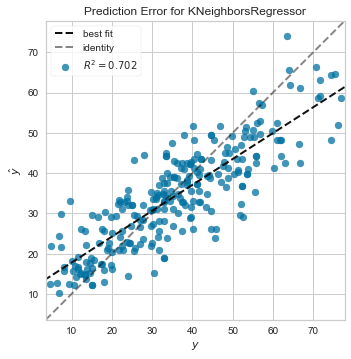

In [10]:
model = KNeighborsRegressor(n_neighbors=9)
# Find the mean accuracy of knn regression using X_test and y_test
model.fit(x_train, y_train)

                                              
# # calculates the mean accuracy of the KNN model
accuracy = model.score(x_test,y_test)
print('Accuracy: ' + str(np.round(accuracy*100, 2)) + '%')

# Load a regression dataset

x, y = load_concrete()

# Create the train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Instantiate the linear model and visualizer
model = KNeighborsRegressor()
visualizer = PredictionError(model)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()       


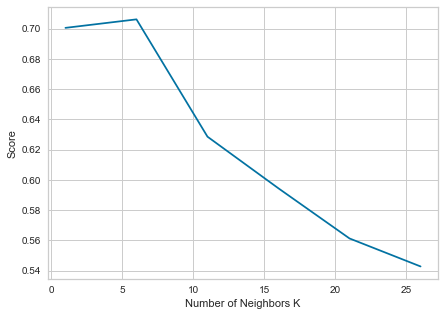

In [11]:
n_neighbors = np.arange(1, 30,5) #from 1 to 30 neighbors
scores = []
for n in n_neighbors:
    model.set_params(n_neighbors=n)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
plt.figure(figsize=(7, 5))

plt.xlabel("Number of Neighbors K")
plt.ylabel("Score")
plt.plot(n_neighbors, scores)

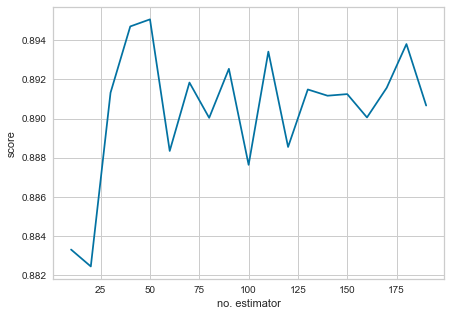

In [12]:
model = RandomForestRegressor(n_jobs=-1) #taking some time(not more than a minute)

estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(x_train, y_train)
    scores.append(model.score(x_test, y_test))
plt.figure(figsize=(7, 5))
plt.xlabel("no. estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

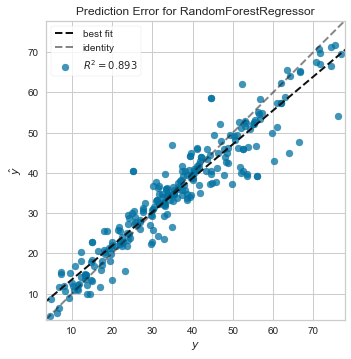

In [13]:
# Load a regression dataset
X, y = load_concrete()

# Create the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Instantiate the linear model and visualizer
model = RandomForestRegressor()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

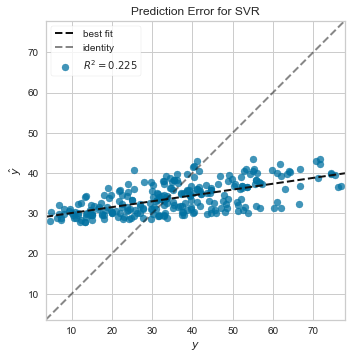

In [14]:
from sklearn.svm import SVR
from sklearn import svm

# Load a regression dataset

X, y = load_concrete()


# # Instantiate the linear model and visualizer
model = svm.SVR()
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()       